step reward: -1
discount factor: 0.9
theta (cutoff convergence): 1e-10
Iteration: 1
current delta: 9.0


<ipython-input-12-953e6f068b22>:107: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('winter', 10)


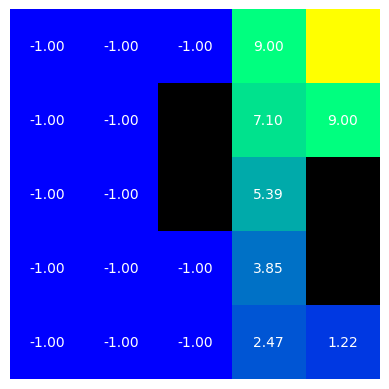

Iteration: 2
current delta: 8.1


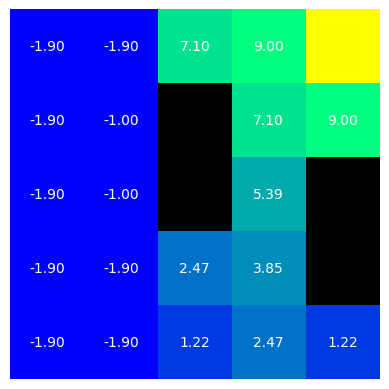

Iteration: 3
current delta: 7.289999999999999


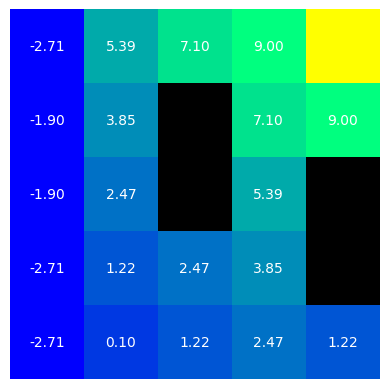

Iteration: 4
current delta: 6.561


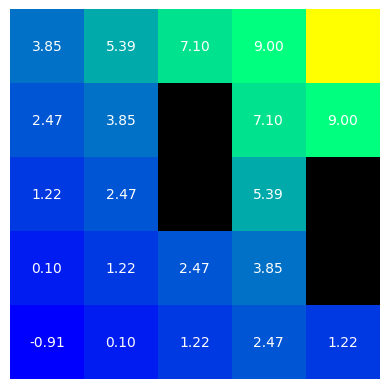

Iteration: 5
current delta: 0


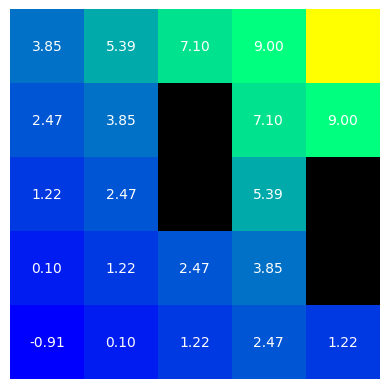

i, j: (0, 0)
actions: ['L' 'R' 'U' 'D']
best action: [1]
i, j: (0, 1)
actions: ['L' 'R' 'U' 'D']
best action: [1]
i, j: (0, 2)
actions: ['L' 'R' 'U' 'D']
best action: [1]
i, j: (0, 3)
actions: ['L' 'R' 'U' 'D']
best action: [1]
i, j: (0, 4)
actions: ['L' 'R' 'U' 'D']
best action: [0 3]
i, j: (1, 0)
actions: ['L' 'R' 'U' 'D']
best action: [1 2]
i, j: (1, 1)
actions: ['L' 'R' 'U' 'D']
best action: [2]
i, j: (1, 2)
actions: ['L' 'R' 'U' 'D']
best action: [1 2]
i, j: (1, 3)
actions: ['L' 'R' 'U' 'D']
best action: [1 2]
i, j: (1, 4)
actions: ['L' 'R' 'U' 'D']
best action: [2]
i, j: (2, 0)
actions: ['L' 'R' 'U' 'D']
best action: [1 2]
i, j: (2, 1)
actions: ['L' 'R' 'U' 'D']
best action: [2]
i, j: (2, 2)
actions: ['L' 'R' 'U' 'D']
best action: [1]
i, j: (2, 3)
actions: ['L' 'R' 'U' 'D']
best action: [2]
i, j: (2, 4)
actions: ['L' 'R' 'U' 'D']
best action: [2]
i, j: (3, 0)
actions: ['L' 'R' 'U' 'D']
best action: [1 2]
i, j: (3, 1)
actions: ['L' 'R' 'U' 'D']
best action: [1 2]
i, j: (3, 2)
acti

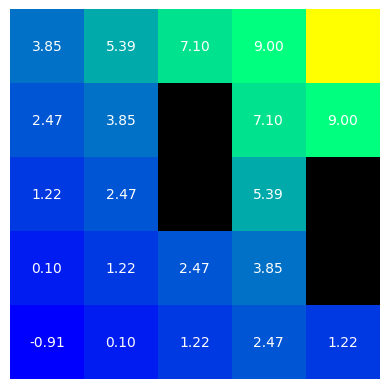

<ipython-input-12-953e6f068b22>:133: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('winter', 10)


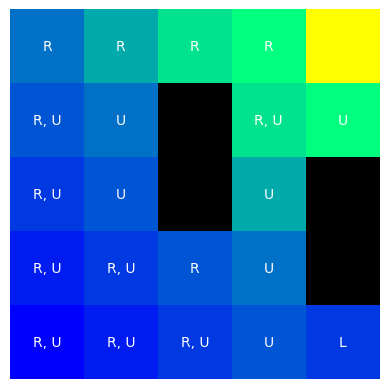

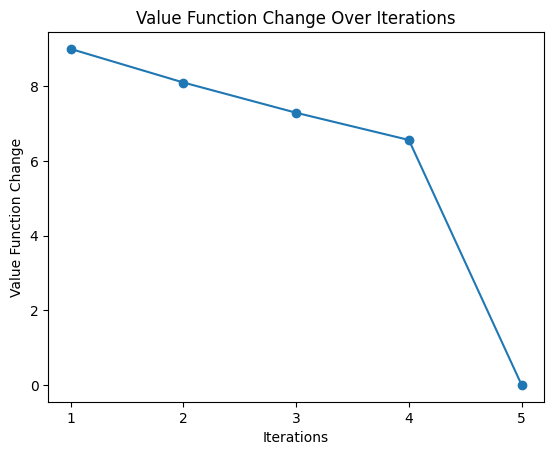

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# function that finds the next state and reward for all state-action pairs in the grid world
def find_policy(action_space, actions, step_reward, terminal_states):
    policy = {}
    # double for loop to iterate through entire state space
    for i in range(x):
        for j in range(y):
            state = (i, j)
            for action in actions:
                reward = step_reward
                next_state = tuple(np.add(state, action_space[action]))

                # checks to see if action leads to goal or blocked state
                out_of_bounds_check = True
                for reward_coord_key_value in terminal_states.values():
                    if next_state in reward_coord_key_value['coords']:
                        reward += reward_coord_key_value['reward']
                        out_of_bounds_check = False
                        break

                # checks to see if next state is a valid state in 2D array
                # also checks if an obstacle is hit
                if out_of_bounds_check:
                    if check_move(next_state):
                        next_state = state

                policy[(state, action)] = (next_state, reward)

    return policy


# function that checks the existence of the next state in the 2D grid world
def check_move(next_state):
    if next_state[0] < 0 or next_state[0] >= x or next_state[1] < 0 or next_state[1] >= y:
        return True
    return False


# function that checks is state is goal or blocked state
def check_terminal_state(state, terminal_states):
    return state in terminal_states.get('goal').get('coords') + terminal_states.get('blocked').get('coords')


# function that performs main loop of value iteration algorithm and returns optimal value function and policy
def iterate_values(x, y, terminal_states, actions, opt_policy, value, gamma, theta, value_delta_list,
                   true_goal_state, blocked_states_list):
    converged = False
    i = 0
    # counts number of iterations of the value iteration algorithm
    num_iter = 0

    while not converged:
        delta = 0

        num_iter += 1
        # double for loop to iterate through entire state space
        for i in range(x):
            for j in range(y):
                state = (i, j)
                if check_terminal_state(state, terminal_states):
                    value[state] = 0
                else:
                    prev_value = value[state]
                    new_value = []
                    for action in actions:
                        (next_state, reward) = opt_policy.get((state, action))
                        new_value.append(reward + gamma * value[next_state])
                    value[state] = max(new_value)
                    delta = max(delta, np.abs(prev_value - value[state]))

        # print value grid at EACH iteration
        print(f"Iteration: {num_iter}")
        print(f"current delta: {delta}")
        graph_value_function(value, terminal_states, true_goal_state, blocked_states_list)

        # add value delta to list for making plot
        value_delta_list.append(delta)

        # check if convergence is achieved
        converged = True if delta < theta else False

    # double for loop to iterate through entire state space
    for i in range(x):
        for j in range(y):
            state = (i, j)
            new_state_value = []
            for action in actions:
                (next_state, reward) = opt_policy.get((state, action))
                new_state_value.append(reward + gamma * value[next_state])
            new_state_value = np.array(new_state_value)
            best_action_idx = np.where(new_state_value == new_state_value.max())[0]

            print(f"i, j: ({i}, {j})")
            print(f"actions: {actions}")
            print(f"best action: {best_action_idx}")

            # get ALL actions, not just the first one
            a = actions[np.array([0, 1])]
            opt_policy[state] = actions[best_action_idx]

    print(num_iter, 'total iterations of value iteration')
    return value, opt_policy


def graph_value_function(value, terminal_states, true_goal_state, blocked_states_list):
    cmap = plt.cm.get_cmap('winter', 10)
    norm = plt.Normalize(value.min(), value.max())
    rgba = cmap(norm(value))

    for blocked_state in blocked_states_list:
        for coord in blocked_state['coords']:
            idx = coord
            rgba[idx] = 0.0, 0.0, 0.0, 1.0

    for coord in true_goal_state['coords']:
        idx = coord
        rgba[idx] = 1.0, 1.0, 0.0, 1.0

    fig, ax = plt.subplots()
    im = ax.imshow(rgba, interpolation='nearest')

    for i in range(value.shape[0]):
        for j in range(value.shape[1]):
            if value[i, j] != 0:
                text = ax.text(j, i, f"{value[i, j]:.2f}", ha="center", va="center", color="w")

    plt.axis('off')
    plt.show()


def graph_optimal_policy(value, policy, terminal_states, true_goal_state, blocked_states_list):
    cmap = plt.cm.get_cmap('winter', 10)
    norm = plt.Normalize(value.min(), value.max())
    rgba = cmap(norm(value))

    for blocked_state in blocked_states_list:
        for coord in blocked_state['coords']:
            idx = coord
            rgba[idx] = 0.0, 0.0, 0.0, 1.0

    for coord in true_goal_state['coords']:
        idx = coord
        rgba[idx] = 1.0, 1.0, 0.0, 1.0

    fig, ax = plt.subplots()
    im = ax.imshow(rgba, interpolation='nearest')

    for i in range(value.shape[0]):
        for j in range(value.shape[1]):
            if value[i, j] != 0:
                policy_str = ""
                policy_actions_array = policy[i, j]
                policy_str_len = len(policy_actions_array)
                policy_str = ", ".join(policy_actions_array)

                text = ax.text(j, i, policy_str, ha="center", va="center", color="w")

    plt.axis('off')
    plt.show()


def plot_value_iter(value_delta_list):
    value_delta_list_len = len(value_delta_list)

    x_data = range(1, value_delta_list_len+1)

    plt.figure()
    plt.plot(x_data, value_delta_list, 'o-')

    plt.xlabel('Iterations')
    plt.ylabel('Value Function Change')
    plt.title('Value Function Change Over Iterations')
    plt.xticks(x_data)


if __name__ == '__main__':
    GRID_OPTION = "example"

    if GRID_OPTION:
        n = 5
    else:
        n = 7

    grid_size = (n, n)
    x, y = grid_size

    # reward for each non-terminal state
    step_reward = -1
    # discount factor
    gamma = 0.9
    # convergence threshold
    theta = 1e-10

    print(f"step reward: {step_reward}")
    print(f"discount factor: {gamma}")
    print(f"theta (cutoff convergence): {theta}")

    state_space = np.arange(x * y).reshape((x, y))

    action_space = {'L': (0, -1), 'R': (0, 1), 'U': (-1, 0), 'D': (1, 0)}

    actions = np.array(['L', 'R', 'U', 'D'])

    # initialize value delta list
    value_delta_list = []

    if GRID_OPTION == "example":
        goal_states = {'goal': {'reward': 10, 'coords': [(0, 4)]},
                       'blocked': {'reward': 0, 'coords': [(1, 2), (2, 2), (2, 4), (3, 4)]}}
    else:
        goal_states = {'goal': {'reward': 10, 'coords': [(1, 2)]},
                       'blocked': {'reward': 0, 'coords': [(1, 1), (3, 3), (5, 4), (5, 5)]}}

    true_goal_state = goal_states['goal']
    blocked_states_list = [goal_states['blocked']]

    initial_value_function = np.zeros(grid_size)
    # find all state-action pairs
    policy = find_policy(action_space, actions, step_reward, goal_states)

    # calculate optimal value function and optimal policy
    optimal_value_function, optimal_policy = iterate_values(x, y, goal_states, actions, policy, initial_value_function,
                                                    gamma, theta, value_delta_list, true_goal_state,
                                                    blocked_states_list)

    graph_value_function(optimal_value_function, goal_states, true_goal_state, blocked_states_list)
    graph_optimal_policy(optimal_value_function, optimal_policy, goal_states, true_goal_state, blocked_states_list)
    plot_value_iter(value_delta_list)

    plt.show()

